In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyorb

In [10]:
Centaurs = pd.read_csv("Data/Centaurs.csv", index_col=0)
Centaurs = Centaurs[['a', 'e', 'i', 'w', 'om', 'ma']]
Centaurs.loc[:, 'a'] = Centaurs['a'] * 1.496e+11
Centaurs.loc[:, 'w'] = np.radians(Centaurs['w']) 
Centaurs.loc[:, 'om'] = np.radians(Centaurs['om'])
Centaurs.loc[:, 'ma'] = np.radians(Centaurs['ma'])

In [12]:
def kep_to_cart(DF):
    Centaurs_cartesian = []
    for i in range(DF.shape[0]):
        Centaurs_cartesian.append(pyorb.kep_to_cart(DF.iloc[i].values))

    Centaurs_cartesian = pd.DataFrame(Centaurs_cartesian, columns=['x','y','z','Vx','Vy','Vz'])
    Centaurs_cartesian.to_csv("Data/CentaursCartesian.csv")

kep_to_cart(Centaurs)

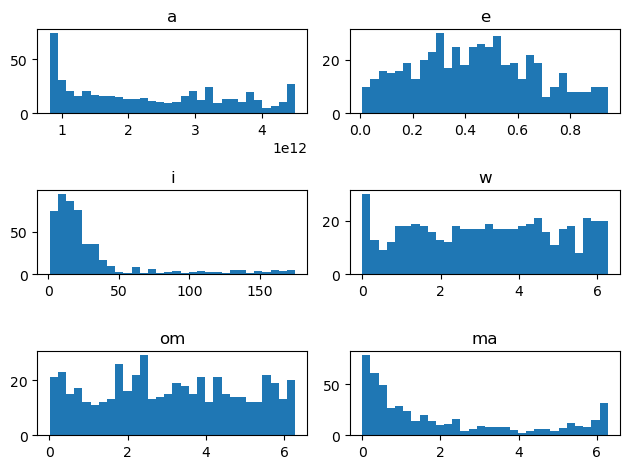

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=2)
col_point=0
for row in ax:
    for col in row:
        col.hist(Centaurs[Centaurs.columns[col_point]], bins=30)
        col.set_title(Centaurs.columns[col_point])
        col_point += 1
        
plt.tight_layout()

In [ ]:
plt.hist